# Exercise

You are a real astronomer and are planning an expensive observational campaign. You want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy). The key piece of information here is that the weather tomorrow depends on the weather today. From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that:

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have:

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that:

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$

- We can start with the sky conditions today and make predictions going forward more and more into the future.
- This will look like a big decision tree. 
- After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at:

$$p({\rm clear}) = 0.83,$$

and:

$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether it was clear or cloudy on the day that you started. The steps that we have taken in this process are a **MARKOV CHAIN**.

![image.png](https://miro.medium.com/max/416/1*frksGjINf5oTjx7WL81U3w.png)

#### Tasks

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)
- Prepare a plot with the number of days on the x axis and the cumulative number of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  
- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.
- Use a summary statistics to determine the most likely value and an error on our estimate.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import astroML.stats

Let's define: $0$ = cloud day, $1$ = clear day. I start by defining the weather today, and I fix it to be cloudy. Secondly, I save the probabilities of the weather tomorrow based on the weather today ($p\_10$ = probability that tomorrow is clear ($1$) if today is cloudy ($0$)). 

I introduce an array of weathers ($array\_w$) that contains the two types of weather that I can have. Moreover, based on the probabilities, I initialize two arrays containing respectively the probabilities if today is cloudy ($prob\_if0$) and the probabilities if it is clear ($prob\_if1$).

To conclude, in the cycle "for" I build an array of weathers ($w$, for which the first element is the weather today) by choosing randomly ($np.random.choice()$) a weather between the ones in $array\_w$ with the corresponding probabilities depending whether it is cloudy or clear.

In [2]:
today = 0
p_10 = 0.5
p_00 = 0.5
p_01 = 0.1
p_11 = 0.9
N = 10000

p_clear = 0.83
p_cloudy = 0.17

w = [today]
array_w = [0, 1]
prob_if0 = np.array([p_00, p_10])
prob_if1 = np.array([p_01, p_11])

for i in range(N):
    if w[i]==0:
        w.append(np.random.choice(array_w, p=prob_if0))
    elif w[i]==1:
        w.append(np.random.choice(array_w, p=prob_if1))

w = np.array(w)

I want now to build the trace-plots for clear and cloudy days (respectively first and second plots). First of all, I compute the cumulative sum of clear days and I divide it to normalize the probability (at the denominator I add $1$ because $np.arange()$ does not consider the last element).

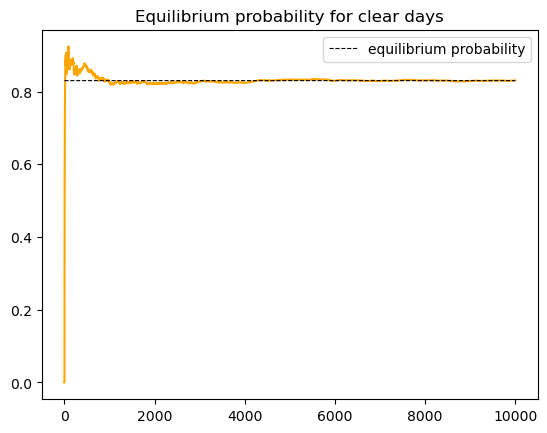

In [3]:
clear = np.cumsum(w)/(np.arange(len(w))+1)
y = np.linspace(0, N, N)

plt.plot(clear, color='orange')
plt.plot(y, y*0+p_clear, color='black', ls='--', lw=0.8, label='equilibrium probability')
plt.legend()
plt.title('Equilibrium probability for clear days')
plt.show()

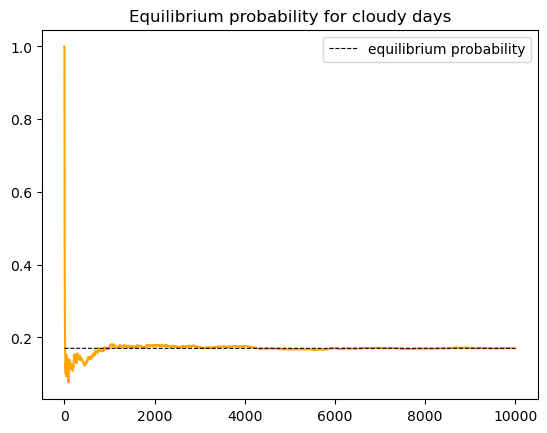

In [4]:
cloudy = 1-clear

plt.plot(cloudy, color='orange')
plt.plot(y, y*0+p_cloudy, color='black', ls='--', lw=0.8, label='equilibrium probability')
plt.legend()
plt.title('Equilibrium probability for cloudy days')
plt.show()

To reveal the distribution of $p\_clear$ and $p\_cloudy$ I make two histograms.

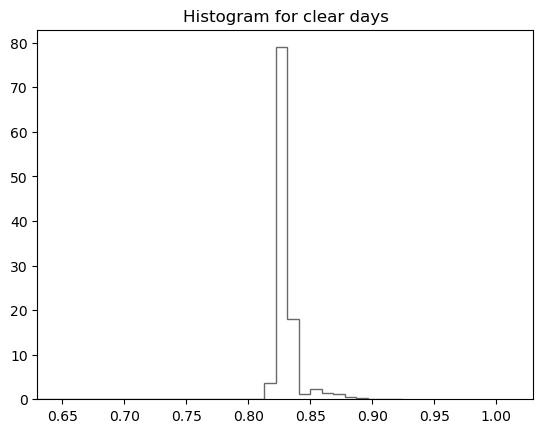

In [5]:
N_bins = int(np.sqrt(len(clear)))

plt.hist(clear, bins=N_bins, color='dimgrey', histtype='step', density=True)
plt.title('Histogram for clear days')
plt.xlim(p_clear-0.2, p_clear+0.2)
plt.show()

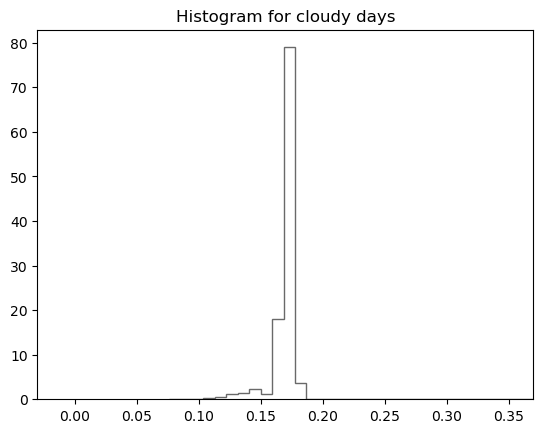

In [6]:
plt.hist(cloudy, bins=N_bins, color='dimgrey', histtype='step', density=True)
plt.title('Histogram for cloudy days')
plt.xlim(p_cloudy-0.2, p_cloudy+0.2)
plt.show()

I now explain the steps for the clear data set, the procedure for the cloudy data set is the same.

To study the summary statistics, firstly I need to remove the burn in for clear data, and create a new array containing all points except the first ones given by the burn in, and I plot the corresponding equilibrium probability.

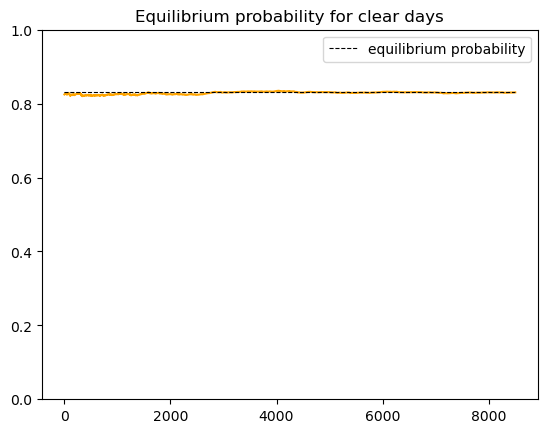

In [8]:
burnin_clear = 1500
NewClear = clear[burnin_clear:]
Y = np.linspace(0, len(NewClear), len(NewClear))

plt.plot(NewClear, color='orange')
plt.plot(Y, Y*0+p_clear, color='black', ls='--', lw=0.8, label='equilibrium probability')
plt.legend()
plt.ylim(0, 1)
plt.title('Equilibrium probability for clear days')
plt.show()

The most robust estimates for the value of the equilibrium probability and its corresponding error are obtained from the median and $\sigma G$, because they are less affected by outliers.

In [9]:
print(f'Median with all the data: {np.median(clear):.4f}')
print(f'SigmaG with all the data: {astroML.stats.sigmaG(clear):.4f}')

print(f'Median with the new data: {np.median(NewClear):.4f}')
print(f'SigmaG with the new data: {astroML.stats.sigmaG(NewClear):.4f}')

Median with all the data: 0.8299
SigmaG with all the data: 0.0037
Median with the new data: 0.8298
SigmaG with the new data: 0.0031


Let's compare them with the mean and the standard deviation.

In [10]:
print(f'Mean with all the data: {np.mean(clear):.4f}')
print(f'Sigma with all the data: {np.std(clear):.4f}')

print(f'Mean with the new data: {np.mean(NewClear):.4f}')
print(f'Sigma with the new data: {np.std(NewClear):.4f}')

Mean with all the data: 0.8307
Sigma with all the data: 0.0200
Mean with the new data: 0.8289
Sigma with the new data: 0.0031


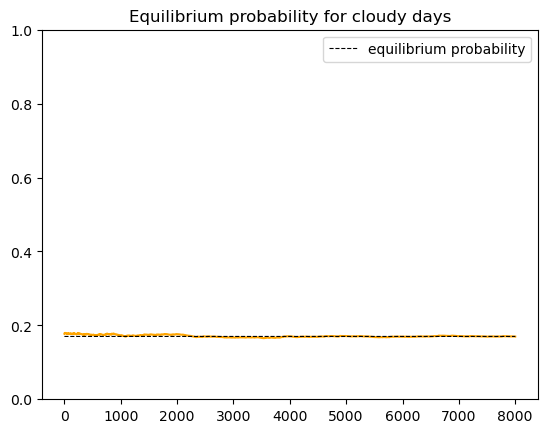

In [11]:
burnin_cloudy = 2000
NewCloudy = cloudy[burnin_cloudy:]
Z = np.linspace(0, len(NewCloudy), len(NewCloudy))

plt.plot(NewCloudy, color='orange')
plt.plot(Z, Z*0+p_cloudy, color='black', ls='--', lw=0.8, label='equilibrium probability')
plt.legend()
plt.ylim(0, 1)
plt.title('Equilibrium probability for cloudy days')
plt.show()

In [13]:
print(f'Median with all the data: {np.median(cloudy):.4f}')
print(f'SigmaG with all the data: {astroML.stats.sigmaG(cloudy):.4f}')

print(f'Median with the new data: {np.median(NewCloudy):.4f}')
print(f'SigmaG with the new data: {astroML.stats.sigmaG(NewCloudy):.4f}')
print('\n')
print(f'Mean with all the data: {np.mean(cloudy):.4f}')
print(f'Sigma with all the data: {np.std(cloudy):.4f}')

print(f'Mean with the new data: {np.mean(NewCloudy):.4f}')
print(f'Sigma with the new data: {np.std(NewCloudy):.4f}')

Median with all the data: 0.1701
SigmaG with all the data: 0.0037
Median with the new data: 0.1701
SigmaG with the new data: 0.0023


Mean with all the data: 0.1693
Sigma with all the data: 0.0200
Mean with the new data: 0.1709
Sigma with the new data: 0.0029
